# The $\alpha_s$ method

Very similar to the t-plot method, the $\alpha_s$ method compares an isotherm on a porous material with one that was taken on a reference non-porous surface. The reference isotherm should be measured over a wide pressure range, to be able to compare loading values. First, make sure the data is imported notebook.

In [1]:
# import isotherms
%run import.ipynb

# import the characterisation module
import pygaps.characterisation as pgc

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


Unfortunately, we don't have a reference isotherm in our data. We are instead going to be creative and assume that the adsorption on the silica ($SiO_2$ sample) is a good representation of an adsorption on a non-porous version of the MCM-41 sample. Let's try:

In [2]:
iso_1 = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
iso_2 = next(i for i in isotherms_n2_77k if i.material=='SiO2')

print(iso_1.material)
print(iso_2.material)
try:
    results = pgc.alpha_s(iso_1, reference_isotherm=iso_2, verbose=True)
except Exception as e:
    print('ERROR!:',e)

MCM-41
SiO2
ERROR!: A value in x_new is below the interpolation range.


The data in our reference isotherm is on a smaller range than that in the isotherm that we want to calculate! We are going to be creative again and first model the adsorption behaviour using a `ModelIsotherm`.

Attempting to model using BET.
Model BET success, RMSE is 0.474


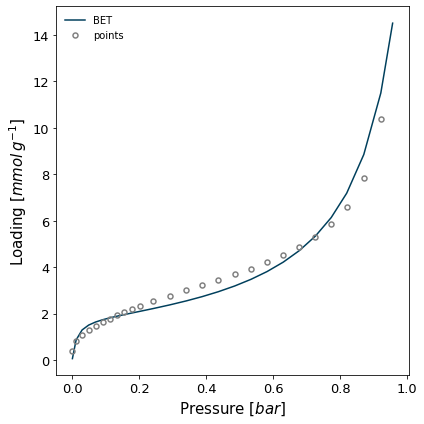

In [3]:
import pygaps
model = pygaps.ModelIsotherm.from_pointisotherm(iso_2, model='BET', verbose=True)

With our model fitting the data pretty well, we can now try the $\alpha_s$ method again.

For linear region 0
The slope is 0.0045 and the intercept is 0.0011, with a correlation coefficient of 0.9848
The adsorbed volume is 0.0381 and the area is 270.0992
For linear region 1
The slope is 0.0006 and the intercept is 0.0084, with a correlation coefficient of 0.9656
The adsorbed volume is 0.2934 and the area is 36.2825


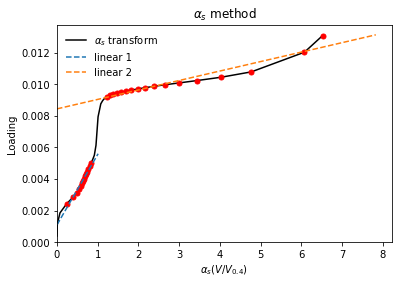

In [4]:
results = pgc.alpha_s(iso_1, model, verbose=True)

The results don't look that bad, considering all our assumptions and modelling. 
There are other parameters which can be specified for the $\alpha_s$ function such as:

- The relative pressure to use as the reducing pressure
- The known area of the reference material. If this is not specified, the BET method is used to calculate the surface area.
- As in the t-plot function, the limits for the straight line selection.

More info can be found in the [documentation of the
module](https://pygaps.readthedocs.io/en/latest/reference/characterisation/alphas_plot.html)